In [ ]:
!pip install python-chess

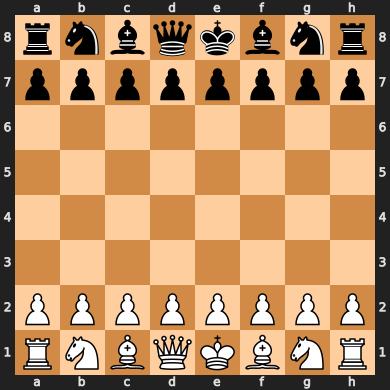

In [ ]:
import chess
import chess.svg
import chess.polyglot
from IPython.display import SVG
import chess.pgn
import datetime
import chess.engine
import random
import time
from math import log,sqrt,e,inf

board = chess.Board()
board

# MiniMax Algorithm

In [ ]:
def helper(depth, board,isMaximizing):
    possibleMoves = board.legal_moves
    bestMove = -9999
    secondBest = -9999
    thirdBest = -9999
    bestMoveFinal = None
    for x in possibleMoves:
        move = chess.Move.from_uci(str(x))
        board.push(move)
        value = max(bestMove, minimax(depth - 1, board, not isMaximizing))
        board.pop()
        if( value > bestMove):
            print("Best score: " ,str(bestMove))
            print("Best move: ",str(bestMoveFinal))
            print("Second best: ", str(secondBest))
            thirdBest = secondBest
            secondBest = bestMove
            bestMove = value
            bestMoveFinal = move
    return bestMoveFinal

def minimax(depth, board, is_maximizing):
    if(depth == 0):
        return -evaluation(board)
    possibleMoves = board.legal_moves
    if(is_maximizing):
        bestMove = -9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = max(bestMove,minimax(depth - 1, board, not is_maximizing))
            board.pop()
        return bestMove
    else:
        bestMove = 9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = min(bestMove, minimax(depth - 1, board, not is_maximizing))
            board.pop()
        return bestMove

# Defining the evaluation function for MiniMax search

def evaluation(board):
    i = 0
    evaluation = 0
    x = True
    try:
        x = bool(board.piece_at(i).color)
    except AttributeError as e:
        x = x
    while i < 63:
        i += 1
        evaluation = evaluation + (getPieceValue(str(board.piece_at(i))) if x else -getPieceValue(str(board.piece_at(i))))
    return evaluation


def getPieceValue(piece):
    if(piece == None):
        return 0
    value = 0
    if piece == "P" or piece == "p":
        value = 10
    if piece == "N" or piece == "n":
        value = 30
    if piece == "B" or piece == "b":
        value = 30
    if piece == "R" or piece == "r":
        value = 50
    if piece == "Q" or piece == "q":
        value = 90
    if piece == 'K' or piece == 'k':
        value = 900
    return value


if __name__ == "__main__":
    engine = chess.engine.SimpleEngine.popen_uci(r'C:\Users\jaswa\Documents\ai\stockfish_20011801_x64.exe')

    count = 0

    movehistory = []
    game = chess.pgn.Game()
    game.headers["Event"] = "AI Project"
    game.headers["Site"] = "Boston"
    game.headers["Date"] = str(datetime.datetime.now().date())
    game.headers["Round"] = 1
    game.headers["White"] = "Stockfish11"
    game.headers["Black"] = "Negamax"
    board = chess.Board()
    while not board.is_game_over(claim_draw=True):
        if board.turn:
            count += 1
            print(f'{count}]')
            print()
            move = engine.play(board, chess.engine.Limit(time=0.1))
            movehistory.append(move.move)
            board.push(move.move)
            print(board)
            print()
        else:
            move = helper(3,board,True)
            if(move == None):
                print("Stockfish11 won")
                break
            else:
                board.push(move)
                print(board)
                print()


FileNotFoundError: ignored

In [ ]:
# Graphical representation of the final board state

SVG(chess.svg.board(board=board,size=400))

# MiniMax with Alpha Beta pruning

In [ ]:
board = chess.Board()
def helper(depth, board,isMaximizing):
    possibleMoves = board.legal_moves
    bestMove = -9999
    bestMoveFinal = None
    for x in possibleMoves:
        move = chess.Move.from_uci(str(x))
        board.push(move)
        value = max(bestMove, minimax(depth - 1, board,-10000,10000, not isMaximizing))
        board.pop()
        if( value > bestMove):
            print("Best score: " ,str(bestMove))
            print("Best move: ",str(bestMoveFinal))
            bestMove = value
            bestMoveFinal = move
    return bestMoveFinal

def minimax(depth, board, alpha, beta, is_maximizing):
    if(depth == 0):
        return -evaluation(board)
    possibleMoves = board.legal_moves
    if(is_maximizing):
        bestMove = -9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = max(bestMove,minimax(depth - 1, board,alpha,beta, not is_maximizing))
            board.pop()
            alpha = max(alpha,bestMove)
            if beta <= alpha:
                return bestMove
        return bestMove
    else:
        bestMove = 9999
        for x in possibleMoves:
            move = chess.Move.from_uci(str(x))
            board.push(move)
            bestMove = min(bestMove, minimax(depth - 1, board,alpha,beta, not is_maximizing))
            board.pop()
            beta = min(beta,bestMove)
            if(beta <= alpha):
                return bestMove
        return bestMove


def calculateMove(board):
    possible_moves = board.legal_moves
    if(len(possible_moves) == 0):
        print("No more possible moves...Game Over")
        sys.exit()
    bestMove = None
    bestValue = -9999
    n = 0
    for x in possible_moves:
        move = chess.Move.from_uci(str(x))
        board.push(move)
        boardValue = -evaluation(board)
        board.pop()
        if(boardValue > bestValue):
            bestValue = boardValue
            bestMove = move

    return bestMove

# Defining the evaluation function for MiniMax search with alpha beta pruning

def evaluation(board):
    i = 0
    evaluation = 0
    x = True
    try:
        x = bool(board.piece_at(i).color)
    except AttributeError as e:
        x = x
    while i < 63:
        i += 1
        evaluation = evaluation + (getPieceValue(str(board.piece_at(i))) if x else -getPieceValue(str(board.piece_at(i))))
    return evaluation

#Filling the board states for MiniMax implementation

def getPieceValue(piece):
    if(piece == None):
        return 0
    value = 0
    if piece == "P" or piece == "p":
        value = 10
    if piece == "N" or piece == "n":
        value = 30
    if piece == "B" or piece == "b":
        value = 30
    if piece == "R" or piece == "r":
        value = 50
    if piece == "Q" or piece == "q":
        value = 90
    if piece == 'K' or piece == 'k':
        value = 900
    return value

#Running the NegaMax algorithm against the Stockfish chess agent

if __name__ == "__main__":
    engine = chess.engine.SimpleEngine.popen_uci(r'C:\Users\jaswa\Documents\ai\stockfish_20011801_x64.exe')

    count = 0

    movehistory = []
    game = chess.pgn.Game()
    game.headers["Event"] = "AI Project"
    game.headers["Site"] = "Boston"
    game.headers["Date"] = str(datetime.datetime.now().date())
    game.headers["Round"] = 1
    game.headers["White"] = "Stockfish11"
    game.headers["Black"] = "Negamax"
    board = chess.Board()
    while not board.is_game_over(claim_draw=True):
        if board.turn:
            count += 1
            print(f'{count}]')
            print()
            move = engine.play(board, chess.engine.Limit(time=0.1))
            movehistory.append(move.move)
            board.push(move.move)
            print(board)
            print()
        else:
            move = helper(3,board,True)
            if(move == None):
                print("Stockfish11 won")
                break
            else:
                board.push(move)
                print(board)
                print()

In [ ]:
# Graphical representation of the final board state

SVG(chess.svg.board(board=board,size=400))

# NegaMax algorithm with Aplha Beta pruning

In [ ]:
#Filling the board states for NegaMax implementation

board = chess.Board()
pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 0, 0, 20, 20, 0, 0, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    0, 0, 0, 0, 0, 0, 0, 0]

knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]
bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 5, 0, 0, 0, 0, 5, -10,
    -10, 10, 10, 10, 10, 10, 10, -10,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]
rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    0, 0, 0, 0, 0, 0, 0, 0]
queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]
kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]

In [ ]:
#Evaluation Function

def evaluate_board():
    if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
    if board.is_stalemate():
        return 0
    if board.is_insufficient_material():
        return 0

    wp = len(board.pieces(chess.PAWN, chess.WHITE))
    bp = len(board.pieces(chess.PAWN, chess.BLACK))
    wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(board.pieces(chess.BISHOP, chess.WHITE))
    bb = len(board.pieces(chess.BISHOP, chess.BLACK))
    wr = len(board.pieces(chess.ROOK, chess.WHITE))
    br = len(board.pieces(chess.ROOK, chess.BLACK))
    wq = len(board.pieces(chess.QUEEN, chess.WHITE))
    bq = len(board.pieces(chess.QUEEN, chess.BLACK))

    material = 100 * (wp - bp) + 320 * (wn - bn) + 330 * (wb - bb) + 500 * (wr - br) + 900 * (wq - bq)

    pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                           for i in board.pieces(chess.PAWN, chess.BLACK)])
    knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                               for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    bishopsq = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                               for i in board.pieces(chess.BISHOP, chess.BLACK)])
    rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)])
    rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                           for i in board.pieces(chess.ROOK, chess.BLACK)])
    queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)])
    queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                             for i in board.pieces(chess.QUEEN, chess.BLACK)])
    kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)])
    kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                           for i in board.pieces(chess.KING, chess.BLACK)])

    eval = material + pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
    if board.turn:
        return eval
    else:
        return -eval

In [ ]:
#Alpha Beta pruning

def alphabeta(alpha, beta, depthleft):
    bestscore = -9999
    if (depthleft == 0):
        return quiesce(alpha, beta)
    for move in board.legal_moves:
        board.push(move)
        score = -alphabeta(-beta, -alpha, depthleft - 1)
        board.pop()
        if (score >= beta):
            return score
        if (score > bestscore):
            bestscore = score
        if (score > alpha):
            alpha = score
    return bestscore

def quiesce( alpha, beta ):
    stand_pat = evaluate_board()
    if( stand_pat >= beta ):
        return beta
    if( alpha < stand_pat ):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            board.push(move)
            score = -quiesce( -beta, -alpha )
            board.pop()

            if( score >= beta ):
                return beta
            if( score > alpha ):
                alpha = score
    return alpha

In [ ]:
#Helper function for the NegaMax evaluation

def selectmove(depth):
    try:
        move = chess.polyglot.MemoryMappedReader("C:/Users/jaswa/Documents/ai/computer.bin").weighted_choice(board).move()
        movehistory.append(move)
        return move
    except:
        bestMove = chess.Move.null()
        bestValue = -99999
        alpha = -100000
        beta = 100000
        for move in board.legal_moves:
            board.push(move)
            boardValue = -alphabeta(-beta, -alpha, depth-1)
            if boardValue > bestValue:
                bestValue = boardValue;
                bestMove = move
            if( boardValue > alpha ):
                alpha = boardValue
            board.pop()
        movehistory.append(bestMove)
        return bestMove

In [ ]:
#Running the NegaMax algorithm against the Stockfish chess agent

if __name__ == "__main__":
    engine = chess.engine.SimpleEngine.popen_uci(r'C:\Users\jaswa\Documents\ai\stockfish_20011801_x64.exe')

    count = 0

    movehistory = []
    game = chess.pgn.Game()
    game.headers["Event"] = "AI Project"
    game.headers["Site"] = "Boston"
    game.headers["Date"] = str(datetime.datetime.now().date())
    game.headers["Round"] = 1
    game.headers["White"] = "Stockfish11"
    game.headers["Black"] = "Negamax"
    board = chess.Board()
    while not board.is_game_over(claim_draw=True):
        if board.turn:
            count += 1
            print(f'{count}]')
            print()
            move = engine.play(board, chess.engine.Limit(time=0.1))
            movehistory.append(move.move)
            board.push(move.move)
            print(board)
            print()
        else:
            move = selectmove(3)
            board.push(move)
            print(board)
            print()


    game.add_line(movehistory)

    game.headers["Result"] = str(board.result(claim_draw=True))

    print(game)
    print(game, file=open("test.pgn", "w"), end="\n\n")


In [ ]:
# Graphical representation of the final board state

SVG(chess.svg.board(board=board, size=400))

# Monte Carlo Search Algorithm

In [ ]:
class node():
    def __init__(self):
        self.state = chess.Board()
        self.action = ''
        self.children = set()
        self.parent = None
        self.N = 0
        self.n = 0
        self.v = 0

In [ ]:
#Defining the Upper confidence bound

def ucb1(curr_node):
    ans = curr_node.v+2*(sqrt(log(curr_node.N+e+(10**-6))/(curr_node.n+(10**-10))))
    return ans

In [ ]:
#Defining the expansion function for adding children to the selected move

def expand(curr_node,white):
    if(len(curr_node.children)==0):
        return curr_node
    max_ucb = -inf
    if(white):
        idx = -1
        max_ucb = -inf
        sel_child = None
        for i in curr_node.children:
            tmp = ucb1(i)
            if(tmp>max_ucb):
                idx = i
                max_ucb = tmp
                sel_child = i

        return(expand(sel_child,0))

    else:
        idx = -1
        min_ucb = inf
        sel_child = None
        for i in curr_node.children:
            tmp = ucb1(i)
            if(tmp<min_ucb):
                idx = i
                min_ucb = tmp
                sel_child = i

        return expand(sel_child,1)

In [ ]:
#Defining the rollout function to find the reward and last move.

def rollout(curr_node):
    if(curr_node.state.is_game_over()):
        board = curr_node.state
        if(board.result()=='1-0'):
            return (1,curr_node)
        elif(board.result()=='0-1'):
            return (-1,curr_node)
        else:
            return (0.5,curr_node)

    all_moves = [curr_node.state.san(i) for i in list(curr_node.state.legal_moves)]

    for i in all_moves:
        tmp_state = chess.Board(curr_node.state.fen())
        tmp_state.push_san(i)
        child = node()
        child.state = tmp_state
        child.parent = curr_node
        curr_node.children.add(child)
    rnd_state = random.choice(list(curr_node.children))

    return rollout(rnd_state)



In [ ]:
#Defining the rollback function to update the policy

def rollback(curr_node,reward):
    curr_node.n+=1
    curr_node.v+=reward
    while(curr_node.parent!=None):
        curr_node.N+=1
        curr_node = curr_node.parent
    return curr_node

In [ ]:
#Helper function for the MCTS

def mcts_pred(curr_node,over,white,iterations=10):
    if(over):
        return -1
    all_moves = [curr_node.state.san(i) for i in list(curr_node.state.legal_moves)]
    map_state_move = dict()

    for i in all_moves:
        tmp_state = chess.Board(curr_node.state.fen())
        tmp_state.push_san(i)
        child = node()
        child.state = tmp_state
        child.parent = curr_node
        curr_node.children.add(child)
        map_state_move[child] = i

    while(iterations>0):
        if(white):
            idx = -1
            max_ucb = -inf
            sel_child = None
            for i in curr_node.children:
                tmp = ucb1(i)
                if(tmp>max_ucb):
                    idx = i
                    max_ucb = tmp
                    sel_child = i
            ex_child = expand(sel_child,0)
            reward,state = rollout(ex_child)
            curr_node = rollback(state,reward)
            iterations-=1
        else:
            idx = -1
            min_ucb = inf
            sel_child = None
            for i in curr_node.children:
                tmp = ucb1(i)
                if(tmp<min_ucb):
                    idx = i
                    min_ucb = tmp
                    sel_child = i

            ex_child = expand(sel_child,1)

            reward,state = rollout(ex_child)

            curr_node = rollback(state,reward)
            iterations-=1
    if(white):

        mx = -inf
        idx = -1
        selected_move = ''
        for i in (curr_node.children):
            tmp = ucb1(i)
            if(tmp>mx):
                mx = tmp
                selected_move = map_state_move[i]
        return selected_move
    else:
        mn = inf
        idx = -1
        selected_move = ''
        for i in (curr_node.children):
            tmp = ucb1(i)
            if(tmp<mn):
                mn = tmp
                selected_move = map_state_move[i]
        return selected_move

In [ ]:
#Running the MCTS against the Stockfish chess agent

board = chess.Board()
engine = chess.engine.SimpleEngine.popen_uci(r'C:\Users\jaswa\Documents\ai\stockfish_20011801_x64.exe')

white = 1
moves = 0
pgn = []
game = chess.pgn.Game()
evaluations = []
sm = 0
cnt = 0
while((not board.is_game_over())):
    all_moves = [board.san(i) for i in list(board.legal_moves)]
    cnt += 1
    print(f'{cnt}]')
    print()
    root = node()
    root.state = board
    result = mcts_pred(root,board.is_game_over(),white)
    board.push_san(result)
    print(board)
    print()
    pgn.append(result)
    white ^= 1
    moves+=1
print(board)
print(" ".join(pgn))
print()
print(board.result())
game.headers["Result"] = board.result()
print(game)
print(game, file=open("test.pgn", "w"), end="\n\n")

engine.quit()

In [ ]:
# Graphical representation of the final board state

SVG(chess.svg.board(board=board, size=400))